In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-08-11 05:42:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.78MB/s    in 47s     

2020-08-11 05:42:48 (6.55 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [12]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/data')
zip_ref.close()
 
base_dir = '/tmp/data/rockpaperscissors'
os.listdir('/tmp/data/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [13]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [14]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [15]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [20]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (200, 200)
BATCH_SIZE = 16
SEED = 72
def get_set():
    train_path = "/tmp/data/rockpaperscissors/rps-cv-images"
    train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.4, 
                                   rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2)
    train_set = train_gen.flow_from_directory(train_path, target_size=IMAGE_SIZE, \
                                              batch_size=BATCH_SIZE,seed=SEED, \
                                              subset='training')
    val_set = train_gen.flow_from_directory(train_path, target_size=IMAGE_SIZE, \
                                            batch_size=BATCH_SIZE,seed=SEED, \
                                            subset='validation')
    return train_set, val_set
train_set,val_set = get_set()

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [46]:
from tensorflow.keras.applications import xception
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
transfer_model=tf.keras.applications.xception.Xception(weights='imagenet'
                                                       ,include_top=False,
                                                      input_shape=(200,200,3),
                                                      pooling='avg')
transfer_model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  BatchNormalization
transfer_model.trainable = False
model = Sequential()
model.add(transfer_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [49]:
EPOCHS=10
history = model.fit(train_set, epochs=EPOCHS, steps_per_epoch=25, 
      validation_data=val_set, 
      validation_steps=5,  
      verbose=2)

Epoch 1/10
25/25 - 81s - loss: 0.1402 - accuracy: 0.9550 - val_loss: 0.0830 - val_accuracy: 0.9625
Epoch 2/10
25/25 - 81s - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.0771 - val_accuracy: 0.9625
Epoch 3/10
25/25 - 82s - loss: 0.1177 - accuracy: 0.9675 - val_loss: 0.2146 - val_accuracy: 0.9375
Epoch 4/10
25/25 - 79s - loss: 0.0733 - accuracy: 0.9819 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 5/10
25/25 - 81s - loss: 0.0615 - accuracy: 0.9775 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 6/10
25/25 - 81s - loss: 0.0989 - accuracy: 0.9550 - val_loss: 0.0673 - val_accuracy: 0.9500
Epoch 7/10
25/25 - 81s - loss: 0.2428 - accuracy: 0.9171 - val_loss: 0.2051 - val_accuracy: 0.9500
Epoch 8/10
25/25 - 81s - loss: 0.1793 - accuracy: 0.9400 - val_loss: 0.3218 - val_accuracy: 0.9000
Epoch 9/10
25/25 - 81s - loss: 0.0757 - accuracy: 0.9750 - val_loss: 0.0607 - val_accuracy: 0.9875
Epoch 10/10
25/25 - 79s - loss: 0.0584 - accuracy: 0.9845 - val_loss: 0.1439 - val_accuracy: 0.9625


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 1539      
Total params: 21,912,107
Trainable params: 1,050,627
Non-trainable params: 20,861,480
_________________________________________________________________


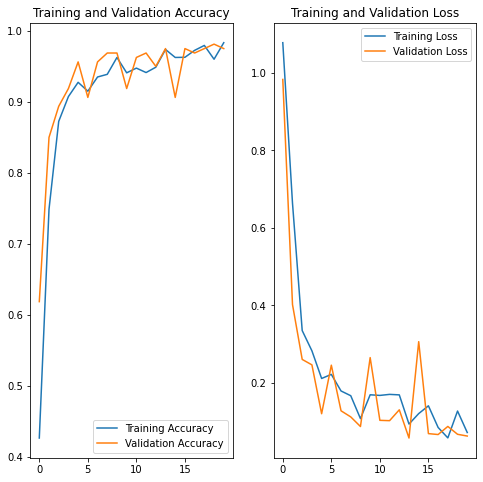

In [ ]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

dapat dilihat dari grafik bahwa accuracy dan vall accuracy tidak berjarak jauh dan dari waktu ke waktu semakin meningkat sehingga tidak terjadi overfitting. Dan nilai loss dan val loss juga dari waktu ke waktu semakin turun sehingga model yang digunakan cukup bagus.

---


Ada beberapa pilihan untuk menghindari overfitting selain image augmentation, yaitu:

1. Menambah lagi convolution layer dan max pooling.  Kita bisa mengurangi jarak antara val_acc dengan acc dengan menambah layer ini.
2. Pilihan kedua adalah melakukan modifikasi pada DataImageGenerator


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


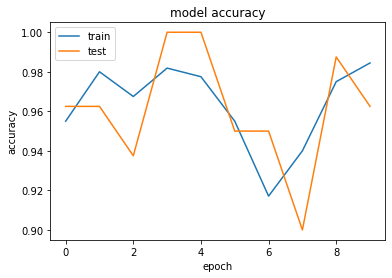

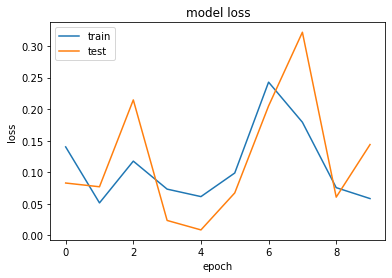

In [52]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

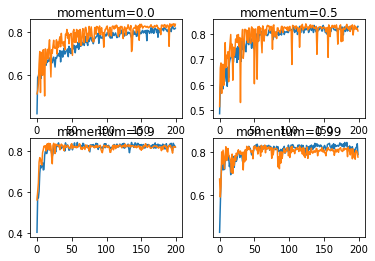

In [54]:
# study of momentum on accuracy for blobs problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=momentum)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('momentum='+str(momentum), pad=-80)
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a momentum
	fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.show()

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
scissors


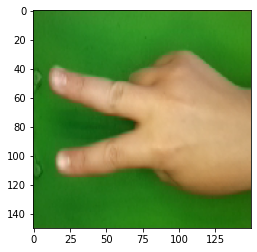

In [ ]:
#@title
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')